In [ ]:
"""
Bag of Words란 단어들의 순서는 전혀 고려하지 않고 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현방법이다.
Bag of Words를 만드는 과정:
    1) 우선 각 단어에 고유한 정수 인덱스르 부여한다.
    2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만든다.
"""

In [ ]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

"""
출력 결과
('정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9)  로 나온다.
"""

In [6]:
"""
사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원한다.
이를 이용하면 영어에 대해서는 손쉽게 BoW를 만들 수 있다. 
CountVectorizer로 간단하고 빠르게 BoW를 만드는 실습을 진행해보도록 하겠다.
"""
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

"""
주의할것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하기에
영어에선 문제가 없지만 한국어에선 제대로된 BoW가 만들어지지 않는다.
=>한국어에는 조사를 포함하기에
"""

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [7]:
# 사용자가 직접 정의한 불용어 사용
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [8]:
# CountVectorizer에서 제공하는 자체 불용어 사용
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


In [9]:
# NLTK에서 지원하는 불용어 사용
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


In [ ]:
"""
문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말한다.
쉽게 생각하면 각 문서에 대한 BoW를 하나의 행렬로 만든 것으로 생각할 수 있으며, BoW와 다른 표현 방법이 아니라 BoW 표현을 
다수의 문서에 대해서 행렬로 표현하고 부르는 용어이다.
예를 들어서>
    문서1 : 먹고 싶은 사과
    문서2 : 먹고 싶은 바나나
    문서3 : 길고 노란 바나나 바나나
    문서4 : 저는 과일이 좋아요
아래와 같이 나올수있다.

DTM은 매우 간단하고 구현하기도 쉽지만, 본질적으로 가지는 몇가지 한계들이 있다.
    1) 희소 표현(Sparse representation): 원-핫 벡터처럼 대부분의 갑이 0으로 표현될수있다.
    2) 단순 빈도 수 기반 접근: the와 같은 불용어 (=>이를 위해 다음챕터에서 TF-IDF가중치에 대해 알아본다.)
"""

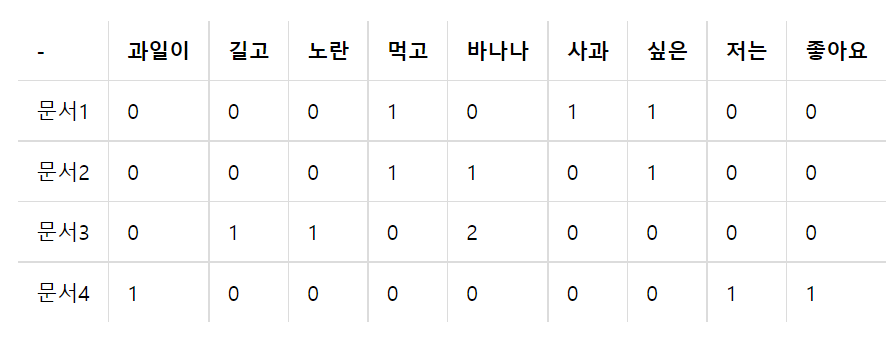

In [ ]:
"""
TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 더 많은 정보를 고려하여 문서들을 비교할 수 있다.
(주의할 점은 TF-IDF가 DTM보다 항상 성능이 뛰어나진 않다.)
TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠다. 
문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있다.

    1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.
    2) df(t) : 특정 단어 t가 등장한 문서의 수.
    3) idf(d,t) : df(t)에 반비례하는 수.(log를 씌우줘서 엄청난 가중치가 생기는것을 줄여준다.)
"""

In [10]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [11]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [12]:
# TF,IDF 그리고 TF-IDF값을 구하는 함수를 구현!
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [13]:
#TF 구하기
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [14]:
#IDF 구하기
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [15]:
#TF-IDF 구하기
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


In [16]:
"""
사이킷런을 통해 DTM과 TF-IDF를 만들어보겠다.
"""
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [17]:
# 사이킷런은 TF-IDF를 자동 계산해주는 TfidVectorizer를 제공한다.
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
